<a href="https://colab.research.google.com/github/anirban071/lda2vec-tf/blob/master/text_min_script_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import nltk
import gensim
import spacy
import tensorflow
import keras
from copy import deepcopy
import collections
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
dt = pd.read_excel('/content/drive/My Drive/colab_work/SHINGRIX social mentions 17-Sep-2018.xlsx', sheet_name='Stream-Data-1')

In [0]:
dfs = deepcopy(dt)

In [6]:
dfs.columns

Index(['UniversalMessageId', 'SocialNetwork', 'SenderUserId',
       'SenderScreenName', 'SenderListedName', 'SenderProfileImgUrl',
       'SenderProfileLink', 'Sender Followers Count', 'SenderInfluencerScore',
       'SenderAge', 'SenderGender', 'Title', 'Message', 'MessageType',
       'CreatedTime', 'Language', 'LanguageCode', 'CountryCode',
       'MediaTypeList', 'Permalink', 'Domain', 'Retweets', 'Tweet Generator',
       'Favorites', 'ReceiverId', 'ReceiverScreenName', 'AssignedBy',
       'AssignedTo', 'Spam', 'Status', 'Priority', 'Sentiment', 'ClientQueues',
       'PartnerQueues', 'ClientCustomProps', 'PartnerCustomProps',
       'Custom Tags', 'Action Time', 'Method (Hidden field)',
       'Contact Source (Hidden field)', 'Business Unit', 'Country',
       'Business Area', 'Case Owner Country', 'Message Source', 'Brand',
       'Issue', 'Brand Reply', 'Reason for No Reply', 'Franchise', 'Audience',
       'Escalated?', 'Social Engagement POC Brand', 'Geo Target', 'Post Id',

In [0]:
col_nm = []
for i in dfs.columns:
  k = i
  k1 = '_'.join(k.split(' '))
  k2 = '_'.join(k1.split('.'))
  col_nm = col_nm + [k2]

In [0]:
dfs.columns = col_nm

In [9]:
dfs.columns

Index(['UniversalMessageId', 'SocialNetwork', 'SenderUserId',
       'SenderScreenName', 'SenderListedName', 'SenderProfileImgUrl',
       'SenderProfileLink', 'Sender_Followers_Count', 'SenderInfluencerScore',
       'SenderAge', 'SenderGender', 'Title', 'Message', 'MessageType',
       'CreatedTime', 'Language', 'LanguageCode', 'CountryCode',
       'MediaTypeList', 'Permalink', 'Domain', 'Retweets', 'Tweet_Generator',
       'Favorites', 'ReceiverId', 'ReceiverScreenName', 'AssignedBy',
       'AssignedTo', 'Spam', 'Status', 'Priority', 'Sentiment', 'ClientQueues',
       'PartnerQueues', 'ClientCustomProps', 'PartnerCustomProps',
       'Custom_Tags', 'Action_Time', 'Method_(Hidden_field)',
       'Contact_Source_(Hidden_field)', 'Business_Unit', 'Country',
       'Business_Area', 'Case_Owner_Country', 'Message_Source', 'Brand',
       'Issue', 'Brand_Reply', 'Reason_for_No_Reply', 'Franchise', 'Audience',
       'Escalated?', 'Social_Engagement_POC_Brand', 'Geo_Target', 'Post_Id',

In [0]:
dfs_eng = dfs[dfs['Language']=='English']
dfs_eng = dfs_eng[dfs_eng.Message.notnull()]

In [11]:
collections.Counter(np.array(dfs_eng['SenderGender']))

Counter({'F': 11, 'FEMALE': 1, 'M': 3, 'MALE': 3, nan: 1169})

In [0]:
r,c = dfs_eng.shape

In [13]:
r

1187

In [0]:
lst = dfs_eng.isna().sum()/r
df1 = pd.DataFrame(lst)
df1.columns = ['perc_null']
df1['null_cnt'] = list(dfs_eng.isna().sum())
df1['vars'] = df1.index
df1 = df1.sort_values(by = ['perc_null'], ascending=[False])

In [0]:
msg = list(dfs_eng.Message)

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#from nltk.tokenize import word_tokenize
#print(word_tokenize(h1.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
stpwrd = list(set(stopwords.words('english')))

In [18]:
np.array(stpwrd)

array(['can', 'be', 'am', 'some', 'ain', "hadn't", 'below', 'had', 're',
       'same', 'now', 'yourself', 'between', 'in', "that'll",
       'themselves', 'hadn', 'me', 'about', 'she', "aren't", 'are',
       "it's", 'which', 'yourselves', 'further', 'is', "you'd", 'ma',
       'the', 'm', 'to', 'ours', 't', 'couldn', 'than', 'won', 'isn',
       'or', 'y', 'having', 'been', 'when', 'an', 'each', 'of', 'at',
       'he', 'while', 'itself', 'no', 'll', 'very', 'himself', 'who',
       'will', 'i', 'before', 'herself', 'why', 'with', 'by', "shouldn't",
       "wasn't", 'weren', 'on', 'from', "you've", 's', 'this', 'mightn',
       "hasn't", 'they', 'ourselves', "don't", 'for', "mustn't",
       "haven't", 'through', "she's", 'mustn', 'hasn', 'wasn', "mightn't",
       'has', "you're", 'again', 'did', 'off', 'as', 'where', "should've",
       'have', 'my', 'both', 'not', 'most', 'doesn', 'under', 'them',
       'our', "isn't", 'there', 'these', "shan't", "won't", "doesn't",
       'their

In [0]:
rmv_stpw = ["but","don't","weren't","aren't","hadn't","wouldn't","wasn't","mightn't","shouldn't","couldn't","doesn't","won't","isn't","didn't","mustn't","hasn't","shan't","haven't","however","don","weren","aren","hadn","wouldn","wasn","mightn","shouldn","couldn","doesn","won","isn","didn","mustn","hasn","shan","haven"]
stpwrd1 = [i for i in stpwrd if i not in rmv_stpw]

In [20]:
np.array(stpwrd1)

array(['can', 'be', 'am', 'some', 'ain', 'below', 'had', 're', 'same',
       'now', 'yourself', 'between', 'in', "that'll", 'themselves', 'me',
       'about', 'she', 'are', "it's", 'which', 'yourselves', 'further',
       'is', "you'd", 'ma', 'the', 'm', 'to', 'ours', 't', 'than', 'or',
       'y', 'having', 'been', 'when', 'an', 'each', 'of', 'at', 'he',
       'while', 'itself', 'no', 'll', 'very', 'himself', 'who', 'will',
       'i', 'before', 'herself', 'why', 'with', 'by', 'on', 'from',
       "you've", 's', 'this', 'they', 'ourselves', 'for', 'through',
       "she's", 'has', "you're", 'again', 'did', 'off', 'as', 'where',
       "should've", 'have', 'my', 'both', 'not', 'most', 'under', 'them',
       'our', 'there', 'these', 'theirs', "you'll", 'yours', 'were',
       'because', 'those', 'him', 'after', 'few', 'your', 'we', 'how',
       'its', 'any', 'so', 'needn', 'such', 'own', 'o', 'whom', 'you',
       'more', 'during', 'nor', 'then', 'until', 'and', 'above', 'doing',
 

In [21]:
import re

text = u'This dog \U0001f602'
print(text) # with emoji

emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642"
                       "]+", flags=re.UNICODE)

emoji_pattern.sub(r'', text).strip() # no emoji


This dog 😂


'This dog'

In [0]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return(tokens_re.findall(s))
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return(tokens)

In [0]:
removetable = str.maketrans('', '', "@#$%!^&*+=}{,.><_?/\|;:][)(0123456789")
wordnet_lemmatizer = WordNetLemmatizer()
msg_lst = []
for m in msg:
  m = str(m)
  m1 = emoji_pattern.sub(r'', m).strip()
  m1 = re.sub('http\S+', '', re.sub('FTP\S+', '', m1)).strip()
  m1 = re.sub('\n',' ',m1).strip()
  h1 = preprocess(m1.lower())
  h2 = [s.translate(removetable) for s in h1]
  h21 = [nn for nn in h2 if nn!='']
  h3 = [wordnet_lemmatizer.lemmatize(a1, pos='v') for a1 in h21]
  h4 = [a2 for a2 in h3 if a2 not in stpwrd1]
  msg_lst.append([i for i in h4 if ((i!='') & (len(i)>=2) & (len(i)<=30))])


In [24]:
'''
nltk.download('words')
wordlist = [w.lower() for w in nltk.corpus.words.words('en')]
'''

"\nnltk.download('words')\nwordlist = [w.lower() for w in nltk.corpus.words.words('en')]\n"

In [0]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


In [26]:
'''
text = ''
for u1 in msg_lst:
  text = text + ' '+ ' '.join(u1)
text = text.strip()
text
'''

"\ntext = ''\nfor u1 in msg_lst:\n  text = text + ' '+ ' '.join(u1)\ntext = text.strip()\ntext\n"

In [27]:
'''
wordcloud = WordCloud(background_color='white', width=2000, height=1000, max_words=5000).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
'''

'\nwordcloud = WordCloud(background_color=\'white\', width=2000, height=1000, max_words=5000).generate(text)\n\nplt.figure( figsize=(20,10), facecolor=\'k\')\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.tight_layout(pad=0)\nplt.show()\n'

In [28]:
'''
text_bi = ''
for u2 in msg_lst:
  bigrm = nltk.bigrams(u2)
  blst = list(bigrm)
  t2 = ' '.join(['_'.join(i)for i in blst])
  text_bi = text_bi + ' ' + t2 
text_bi = text_bi.strip()
'''

"\ntext_bi = ''\nfor u2 in msg_lst:\n  bigrm = nltk.bigrams(u2)\n  blst = list(bigrm)\n  t2 = ' '.join(['_'.join(i)for i in blst])\n  text_bi = text_bi + ' ' + t2 \ntext_bi = text_bi.strip()\n"

In [29]:
'''
wordcloud = WordCloud(background_color='white', width=2000, height=1000, max_words=5000).generate(text_bi)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
'''

'\nwordcloud = WordCloud(background_color=\'white\', width=2000, height=1000, max_words=5000).generate(text_bi)\n\nplt.figure( figsize=(20,10), facecolor=\'k\')\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.tight_layout(pad=0)\nplt.show()\n'

In [30]:
dfs_eng.columns

Index(['UniversalMessageId', 'SocialNetwork', 'SenderUserId',
       'SenderScreenName', 'SenderListedName', 'SenderProfileImgUrl',
       'SenderProfileLink', 'Sender_Followers_Count', 'SenderInfluencerScore',
       'SenderAge', 'SenderGender', 'Title', 'Message', 'MessageType',
       'CreatedTime', 'Language', 'LanguageCode', 'CountryCode',
       'MediaTypeList', 'Permalink', 'Domain', 'Retweets', 'Tweet_Generator',
       'Favorites', 'ReceiverId', 'ReceiverScreenName', 'AssignedBy',
       'AssignedTo', 'Spam', 'Status', 'Priority', 'Sentiment', 'ClientQueues',
       'PartnerQueues', 'ClientCustomProps', 'PartnerCustomProps',
       'Custom_Tags', 'Action_Time', 'Method_(Hidden_field)',
       'Contact_Source_(Hidden_field)', 'Business_Unit', 'Country',
       'Business_Area', 'Case_Owner_Country', 'Message_Source', 'Brand',
       'Issue', 'Brand_Reply', 'Reason_for_No_Reply', 'Franchise', 'Audience',
       'Escalated?', 'Social_Engagement_POC_Brand', 'Geo_Target', 'Post_Id',

In [0]:
msg_lst_col = []
for ii in msg_lst:
  msg_lst_col = msg_lst_col + [' '.join(ii)]

In [32]:
'''
dfs_mod_dt = pd.DataFrame({'msg':msg_lst_col,'sentiment':dfs_eng.Sentiment})
dfs_mod_dt = dfs_mod_dt[dfs_mod_dt.msg!='']
'''

"\ndfs_mod_dt = pd.DataFrame({'msg':msg_lst_col,'sentiment':dfs_eng.Sentiment})\ndfs_mod_dt = dfs_mod_dt[dfs_mod_dt.msg!='']\n"

In [0]:
import numpy as np
import nltk
import scipy as sp
import pandas as pd
import matplotlib
import sys
import spacy
import theano
import re
import os
from __future__ import division
from nltk.tokenize import word_tokenize
import theano.tensor as T
import gensim
import codecs
import json
import itertools as it
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier as SGDC
from functools import reduce
import datetime
from datetime import datetime, timedelta
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from copy import deepcopy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.utils import class_weight
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.layers.merge import concatenate
from keras.models import load_model


In [34]:
'''
X = dfs_mod_dt.msg.loc[:].values
y = dfs_mod_dt.sentiment.loc[:].values
'''

'\nX = dfs_mod_dt.msg.loc[:].values\ny = dfs_mod_dt.sentiment.loc[:].values\n'

In [35]:
'''
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
total_reviews = X
tokenizer_obj.fit_on_texts(total_reviews)
max_length = max([len(s.split())for s in total_reviews])
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')
'''

"\nfrom tensorflow.python.keras.preprocessing.text import Tokenizer\nfrom tensorflow.python.keras.preprocessing.sequence import pad_sequences\n\ntokenizer_obj = Tokenizer()\ntotal_reviews = X\ntokenizer_obj.fit_on_texts(total_reviews)\nmax_length = max([len(s.split())for s in total_reviews])\nvocab_size = len(tokenizer_obj.word_index) + 1\n\nX_train_tokens = tokenizer_obj.texts_to_sequences(X_train)\nX_test_tokens = tokenizer_obj.texts_to_sequences(X_test)\n\nX_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')\nX_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')\n"

In [36]:
'''
#embedding_vecor_length = 100
pretrained_weights = model_wv.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
model = Sequential()
#model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_length))
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))
model.add(Dropout(0.5))
model.add(LSTM(units=emdedding_size))
#model.add(LSTM(100))
#model.add(recurrent_dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), class_weight=class_weights, shuffle=False, verbose=True)
# Final evaluation of the model
scores = model.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
'''

'\n#embedding_vecor_length = 100\npretrained_weights = model_wv.wv.syn0\nvocab_size, emdedding_size = pretrained_weights.shape\nmodel = Sequential()\n#model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_length))\nmodel.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))\nmodel.add(Dropout(0.5))\nmodel.add(LSTM(units=emdedding_size))\n#model.add(LSTM(100))\n#model.add(recurrent_dropout(0.2))\nmodel.add(Dense(32, activation=\'sigmoid\'))\nmodel.add(Dense(1, activation=\'sigmoid\'))\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\nprint(model.summary())\nclass_weights = class_weight.compute_class_weight(\'balanced\',np.unique(y_train),y_train)\nmodel.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), class_weight=class_weights, shuffle=False, verbose=True)\n# Final evaluation of the model\nscores = model.evaluate(X_test_pad, y_test, verbose=0)\nprin

In [0]:
from gensim.models import Word2Vec, FastText

In [0]:
# define training data
sentences1 = msg_lst
sentences2 = []
for jj in msg_lst:
  sentences2.append(['_'.join(ii) for ii in list(nltk.bigrams(jj))])

In [0]:
sentences = sentences1 + sentences2

In [40]:
'''
import tqdm
model_wv = FastText(sentences1, min_count=1, size=200, alpha=0.025, window=5, iter=200, workers=4, sg=1, negative=2)
'''

'\nimport tqdm\nmodel_wv = FastText(sentences1, min_count=1, size=200, alpha=0.025, window=5, iter=200, workers=4, sg=1, negative=2)\n'

In [41]:
'''
# summarize the loaded model
print(model_wv)
# summarize vocabulary
words = list(model_wv.wv.vocab)
print(words)
# access vector for one word
#print(model['try'])
'''

"\n# summarize the loaded model\nprint(model_wv)\n# summarize vocabulary\nwords = list(model_wv.wv.vocab)\nprint(words)\n# access vector for one word\n#print(model['try'])\n"

In [42]:
'''
model_wv.wv.most_similar('vaccine', topn=10)
'''

"\nmodel_wv.wv.most_similar('vaccine', topn=10)\n"

In [43]:
'''
# save model
model_wv.save('/content/drive/My Drive/colab_work/model_wv.bin')
# load model
new_model = FastText.load('/content/drive/My Drive/colab_work/model_wv.bin')
print(new_model)
'''

"\n# save model\nmodel_wv.save('/content/drive/My Drive/colab_work/model_wv.bin')\n# load model\nnew_model = FastText.load('/content/drive/My Drive/colab_work/model_wv.bin')\nprint(new_model)\n"

**<------------------------------------------------------- Doc2Vec ------------------------------------------------>**

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(sentences1)]

In [46]:
tagged_data[:10]

[TaggedDocument(words=['normally', 'flu', 'shoot', 'bother', 'much', 'try', 'get', 'one', 'every', 'year', 'month', 'ago', 'get', 'flu', 'shoot', 'one', 'arm', 'first', 'shingrix', 'new', 'shingle', 'vaccine', 'arm', 'next', 'day', 'drag', 'shingrix', 'arm', 'bite', 'sore', 'give', 'second', 'day', 'better', 'third', 'day', 'back', 'normal'], tags=['0']),
 TaggedDocument(words=['chadinabhan', 'williamdalemd', 'adamcifu', 'oncologybg', 'bldcancerdoc', 'recommend', 'shingrix', 'adults', 'include', 'post', 'bmt'], tags=['1']),
 TaggedDocument(words=['recommend', 'shingrix', 'adults', 'williamdalemd', 'adamcifu', 'oncologybg', 'bldcancerdoc'], tags=['2']),
 TaggedDocument(words=['dear', 'gsk', 'shingrix', 'vaccine', 'supply', 'problem', 'proper', 'prior', 'plan', 'prevent', 'piss', 'poor', 'performance', 'doubly', 'true', 'shingrix', 'two', 'dosage', 'vaccine'], tags=['3']),
 TaggedDocument(words=["i'll", 'aspirational', 'usual', 'debbie', 'downers', 'physicians', 'region', 'frankly', 'ced

In [0]:
model_dv = Doc2Vec(tagged_data, dm=0, vector_size=200, window=5, alpha=0.0025, seed=42, min_count=1, workers=4, epochs=100, negative=2, dbow_words=1)

In [0]:
model_dv.save('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5_2.model')

In [0]:
model_dv.docvecs['1']

array([-8.73902696e-04, -3.86409536e-02,  1.00185685e-02, -2.48212041e-03,
        1.76647808e-02,  2.33550817e-02,  6.95888977e-03, -2.41936147e-02,
       -3.43376920e-02,  1.03376457e-03,  5.87779582e-02,  6.33143168e-03,
       -1.63015053e-02, -5.10918163e-03, -2.48085652e-02, -2.91392463e-03,
        1.40132790e-03, -3.55064906e-02, -4.15686192e-03, -3.02425423e-03,
        1.13352258e-02,  8.53264704e-04,  1.61505081e-02, -1.71646457e-02,
       -1.73685253e-02, -8.17560405e-03,  1.89389978e-02,  5.72831742e-02,
        1.12610403e-02, -2.94755679e-02, -3.57175097e-02,  5.82720060e-03,
        3.16164941e-02,  8.06565024e-03, -2.07306724e-02, -6.23911014e-03,
        5.02317399e-02, -1.88197959e-02, -2.80507654e-02, -1.19481105e-02,
       -1.38828279e-02, -5.08378865e-03,  3.55631262e-02,  1.27960043e-02,
       -4.62660380e-02,  3.47621879e-03,  3.92509289e-02, -6.21887203e-03,
       -2.56560687e-02, -2.39128750e-02,  4.19105850e-02,  2.04011146e-02,
        9.61243361e-03, -

In [0]:
#collections.Counter(np.array(dfs_eng['MessageType']))
msg_type = ['_'.join(ii.strip().split())for ii in dfs_eng.MessageType]
dfs_eng = dfs_eng.assign(msg_type = msg_type)
pvt1 = pd.pivot_table(dfs_eng, index='UniversalMessageId', columns='msg_type', values='MessageType', aggfunc=len).reset_index()
pvt1 = pvt1.fillna(0)

In [48]:
collections.Counter(np.array(dfs_eng['msg_type']))

Counter({'Blog_Comment': 4,
         'Blog_Post': 40,
         'Facebook_Comment': 7,
         'Facebook_Messenger_(_Received_)': 4,
         'Facebook_Post': 1,
         'Forums': 500,
         'Instagram_Comment': 1,
         'Instagram_Mention': 1,
         'Instagram_Post': 6,
         'News': 193,
         'Reddit_Post': 76,
         'Reviews_Type': 1,
         'Tumblr_Post': 19,
         'Twitter_DM': 5,
         'Twitter_Mention': 171,
         'Twitter_Reply': 58,
         'Twitter_Update': 83,
         'WordPress_Comment': 1,
         'WordPress_Post': 6,
         'YouTube_Video': 6,
         'YouTube_Video_Comment': 4})

In [0]:
#!pip install -U imbalanced-learn
import imblearn

In [50]:
'''
new_model_dv = Doc2Vec.load('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5.model')
model_dv = new_model_dv
d2v_arr = model_dv.docvecs.vectors_docs
feature1 = np.concatenate((d2v_arr, pvt1.values[:,1:]), axis=1)

y = dfs_eng.Sentiment.loc[:].values
le = preprocessing.LabelEncoder()
le.fit(y)
y_le = le.transform(y)

print(collections.Counter(y_le))
print(np.unique(y_le))
print(np.bincount(y_le))
print(y_le.shape[0]/(3*np.bincount(y_le)))

keys = np.unique(y_le)
#values = y_le.shape[0]/(3*np.bincount(y_le))
values = np.array([70,20,200])
dictionary = dict(zip(keys, values))
print(dictionary)

#dictionary = dict({0:math.ceil(1188/237), 1:math.ceil(1188/858), 2:math.ceil(1188/93)})
#print(dictionary)

tmp1 = pd.DataFrame(y_le, columns=['class'])
#tmp1 = tmp1.replace({'class': {0: dictionary[0], 1: dictionary[1], 2: dictionary[2]}})
tmp1 = tmp1['class'].map(dictionary)
tmp1_arr = tmp1.values.reshape(tmp1.shape[0],)
'''

"\nnew_model_dv = Doc2Vec.load('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5.model')\nmodel_dv = new_model_dv\nd2v_arr = model_dv.docvecs.vectors_docs\nfeature1 = np.concatenate((d2v_arr, pvt1.values[:,1:]), axis=1)\n\ny = dfs_eng.Sentiment.loc[:].values\nle = preprocessing.LabelEncoder()\nle.fit(y)\ny_le = le.transform(y)\n\nprint(collections.Counter(y_le))\nprint(np.unique(y_le))\nprint(np.bincount(y_le))\nprint(y_le.shape[0]/(3*np.bincount(y_le)))\n\nkeys = np.unique(y_le)\n#values = y_le.shape[0]/(3*np.bincount(y_le))\nvalues = np.array([70,20,200])\ndictionary = dict(zip(keys, values))\nprint(dictionary)\n\n#dictionary = dict({0:math.ceil(1188/237), 1:math.ceil(1188/858), 2:math.ceil(1188/93)})\n#print(dictionary)\n\ntmp1 = pd.DataFrame(y_le, columns=['class'])\n#tmp1 = tmp1.replace({'class': {0: dictionary[0], 1: dictionary[1], 2: dictionary[2]}})\ntmp1 = tmp1['class'].map(dictionary)\ntmp1_arr = tmp1.values.reshape(tmp1.shape[0],)\n"

In [99]:
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE

print(__doc__)

new_model_dv = Doc2Vec.load('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5_2.model')
model_dv = new_model_dv
d2v_arr = model_dv.docvecs.vectors_docs
feature1 = np.concatenate((d2v_arr, pvt1.values[:,1:]), axis=1)

y = dfs_eng.Sentiment.loc[:].values
le = preprocessing.LabelEncoder()
le.fit(y)
y_le = le.transform(y)


# Create a folder to fetch the dataset
sm = SMOTE(random_state=42)
feature2, y_le2 = sm.fit_resample(feature1, y_le)
#feature2, y_le2 = make_imbalance(feature1, y_le, sampling_strategy={0: 25, 1: 25, 2: 35}, random_state=42)

keys = np.unique(y_le2)
values = y_le2.shape[0]/(3*np.bincount(y_le2))
dictionary = dict(zip(keys, values))
print(dictionary)

tmp1 = pd.DataFrame(y_le2, columns=['class'])
#tmp1 = tmp1.replace({'class': {0: dictionary[0], 1: dictionary[1], 2: dictionary[2]}})
tmp1 = tmp1['class'].map(dictionary)
tmp1_arr = tmp1.values.reshape(tmp1.shape[0],)

X_train, X_test, y_train, y_test, smp_wt_train, smp_wt_test = train_test_split(feature2, y_le2, tmp1_arr, test_size=0.33, random_state=42)

Automatically created module for IPython interactive environment
{0: 1.0, 1: 1.0, 2: 1.0}


In [100]:
feature2.shape

(2574, 221)

In [101]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

model_gbc = GBC(learning_rate=0.01, n_estimators=300, subsample=1, min_samples_split=0.025, min_weight_fraction_leaf=0.01, max_depth=8, random_state=42, max_features='log2', verbose=True)
model_gbc.fit(X_train, y_train, sample_weight=smp_wt_train)
#model_gbc.fit(X_train, y_train)

#model_rfc = RFC(n_estimators=500, max_depth=8, min_samples_leaf=1, random_state=42, max_features="auto", class_weight=dictionary, verbose=True)
#model_rfc.fit(X_train, y_train)

#model_svc = SVC(C=2, kernel='linear', gamma='auto', class_weight='balanced', decision_function_shape='ovo', random_state=42, verbose=True)
#model_svc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        1877.7740            4.71s
         2        1861.7343            4.47s
         3        1845.2654            4.40s
         4        1829.4400            4.33s
         5        1813.5508            4.31s
         6        1797.1824            4.28s
         7        1782.1081            4.27s
         8        1767.7098            4.24s
         9        1753.5517            4.21s
        10        1738.8206            4.20s
        20        1604.9807            4.08s
        30        1486.3637            3.90s
        40        1381.6423            3.74s
        50        1287.9588            3.60s
        60        1202.8312            3.46s
        70        1126.9824            3.30s
        80        1059.1979            3.17s
        90         996.3908            3.02s
       100         939.9410            2.88s
       200         558.5961            1.43s
       300         350.8022            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=8,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.025,
              min_weight_fraction_leaf=0.01, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [0]:
import pickle
pickle.dump(model_gbc, open("/content/drive/My Drive/colab_work/model_gbc_2.dat", "wb"))
loaded_model = pickle.load(open("/content/drive/My Drive/colab_work/model_gbc_2.dat", "rb"))

In [103]:
model_gbc = loaded_model

prd_train = model_gbc.predict(X_train)
prd_test = model_gbc.predict(X_test)
prd = model_gbc.predict(feature2)


from sklearn.metrics import classification_report
y_true = y_train
y_pred = prd_train
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
y_true = y_test
y_pred = prd_test
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
y_true = y_le2
y_pred = prd
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    NEGATIVE       0.98      1.00      0.99       579
     NEUTRAL       1.00      0.97      0.98       578
    POSITIVE       0.98      1.00      0.99       567

   micro avg       0.99      0.99      0.99      1724
   macro avg       0.99      0.99      0.99      1724
weighted avg       0.99      0.99      0.99      1724

              precision    recall  f1-score   support

    NEGATIVE       0.81      0.92      0.86       279
     NEUTRAL       0.90      0.72      0.80       280
    POSITIVE       0.91      0.97      0.94       291

   micro avg       0.87      0.87      0.87       850
   macro avg       0.87      0.87      0.87       850
weighted avg       0.87      0.87      0.87       850

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.97      0.95       858
     NEUTRAL       0.97      0.89      0.93       858
    POSITIVE       0.96      0.99      0.97       858

   micro avg       0

In [150]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(feature1, y_le, test_size=0.33, random_state=42)


prd_train = model_gbc.predict(X_train)
prd_test = model_gbc.predict(X_test)
prd = model_gbc.predict(feature1)


print('<------------------ Model Evaluation Results ---------------------->')

print('\n<---------- Model Evaluation Results on Training Dataset ----------->\n')
y_true = y_train
y_pred = prd_train
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))


print('\n\n<------ Model Evaluation Results on Validation Dataset ----------->\n')
y_true = y_test
y_pred = prd_test
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))


print('\n\n<--------- Model Evaluation Results on Whole Dataset ------------->\n')
y_true = y_le
y_pred = prd
target_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print(classification_report(y_true, y_pred, target_names=target_names))




<------------------ Model Evaluation Results ---------------------->

<---------- Model Evaluation Results on Training Dataset ----------->

              precision    recall  f1-score   support

    NEGATIVE       0.82      0.96      0.88       160
     NEUTRAL       0.98      0.90      0.94       572
    POSITIVE       0.71      0.97      0.82        63

   micro avg       0.92      0.92      0.92       795
   macro avg       0.84      0.94      0.88       795
weighted avg       0.93      0.92      0.92       795



<------ Model Evaluation Results on Validation Dataset ----------->

              precision    recall  f1-score   support

    NEGATIVE       0.69      0.94      0.79        77
     NEUTRAL       0.98      0.86      0.92       286
    POSITIVE       0.77      0.93      0.84        29

   micro avg       0.88      0.88      0.88       392
   macro avg       0.81      0.91      0.85       392
weighted avg       0.91      0.88      0.89       392



<--------- Model Evaluat

In [0]:
#!pip install scikit-plot
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


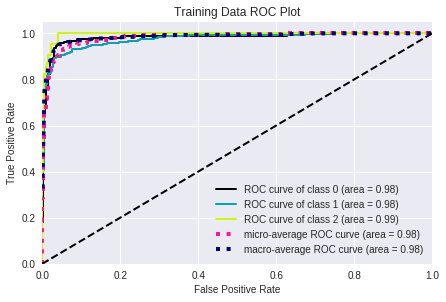

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


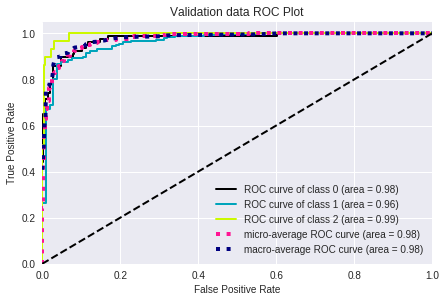

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


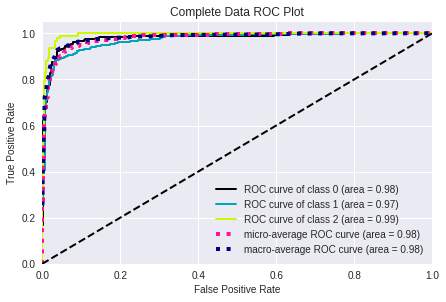

In [177]:
prd_train = model_gbc.predict_proba(X_train)
prd_test = model_gbc.predict_proba(X_test)
prd = model_gbc.predict_proba(feature1)


y_true = y_train
y_pred = prd_train



skplt.metrics.plot_roc_curve(y_true, y_pred)
plt.axis("on")
plt.tight_layout(pad=0)
plt.title('Training Data ROC Plot')
plt.show()
#fig.savefig('/content/drive/My Drive/colab_work/plot.png')

#skplt.metrics.plot_precision_recall_curve(y_true, y_pred)
#plt.legend(loc=4)
#plt.show()


y_true = y_test
y_pred = prd_test

skplt.metrics.plot_roc_curve(y_true, y_pred)
plt.axis("on")
plt.tight_layout(pad=0)
plt.title('Validation data ROC Plot')
plt.show()



y_true = y_le
y_pred = prd

skplt.metrics.plot_roc_curve(y_true, y_pred)
plt.axis("on")
plt.tight_layout(pad=0)
plt.title('Complete Data ROC Plot')
plt.show()

In [151]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
res1 = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

In [138]:
#res1.keys()
res2 = {ii: res1[ii] for ii in ['NEGATIVE','POSITIVE','NEUTRAL']}
pd.DataFrame(res2).T

,f1-score,precision,recall,support
NEGATIVE,0.852273,0.773196,0.949367,237.0
NEUTRAL,0.932027,0.981935,0.886946,858.0
POSITIVE,0.826291,0.727273,0.956522,92.0


In [113]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true, y_pred, average=None)

(array([0.77319588, 0.98193548, 0.72727273]),
 array([0.94936709, 0.88694639, 0.95652174]),
 array([0.85227273, 0.93202694, 0.82629108]),
 array([237, 858,  92]))

In [52]:
q1 = (0.96*160+0.9*572+0.97*63)/795
q2 = (0.94*77+0.86*286+0.93*29)/392
q3 = (0.95*237+0.89*858+0.96*92)/1187
print('train acc = ',q1, ', test acc = ',q2, ', total acc = ',q3)

train acc =  0.9176226415094341 , test acc =  0.8808928571428573 , total acc =  0.9074052232518954


In [0]:
?classification_report

In [0]:
msg_lst_comb = [' '.join(jj) for jj in msg_lst]
rr1 = pd.pivot_table(dfs_eng, index=['Sentiment','MessageType'], values=['UniversalMessageId'], aggfunc=len).reset_index()
rr1 = rr1.sort_values(by=['UniversalMessageId'], ascending=[False])
rr2 = rr1[(rr1.Sentiment!='NEUTRAL') & (rr1.UniversalMessageId>=7)][['Sentiment','MessageType']].values
rr2

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df_test = pd.DataFrame({'msg': msg_lst_comb, 'class':list(dfs_eng.Sentiment.loc[:].values), 'msg_type':list(dfs_eng.MessageType.loc[:].values)})
#for ii in np.unique(dfs_eng.Sentiment.loc[:].values):
for ii in rr2:
  tmp1 = df_test[(df_test['class']==ii[0]) & (df_test['msg_type']==ii[1])]
  tmp2 = list(tmp1.msg)
  vectorizer = CountVectorizer(ngram_range=(1,4), binary=False, analyzer='word')
  X_cnt_vec = vectorizer.fit_transform(tmp2)
  X_cnt_vec = X_cnt_vec.toarray()
  n_gram = [len(ii.split()) for ii in vectorizer.get_feature_names()]
  dt1 = pd.DataFrame(X_cnt_vec, columns=vectorizer.get_feature_names())
  word_cnt_df_sum1 = dt1.sum(axis=0)
  TF_df = pd.DataFrame({'1_to_4_gram_words': vectorizer.get_feature_names(), 'TF': list(word_cnt_df_sum1), 'n_gram':n_gram})
  vectorizer = CountVectorizer(ngram_range=(1,4), binary=True, analyzer='word')
  X_cnt_vec = vectorizer.fit_transform(tmp2)
  X_cnt_vec = X_cnt_vec.toarray()
  #n_gram = [len(ii.split()) for ii in vectorizer.get_feature_names()]
  dt1 = pd.DataFrame(X_cnt_vec, columns=vectorizer.get_feature_names())
  word_cnt_df_sum1 = dt1.sum(axis=0)
  DF_df = pd.DataFrame({'1_to_4_gram_words': vectorizer.get_feature_names(), 'DF': list(word_cnt_df_sum1)})
  Fin_df = pd.merge(TF_df, DF_df, left_on='1_to_4_gram_words', right_on='1_to_4_gram_words', how='left')
  s1 = '/content/drive/My Drive/colab_work/' + str(ii[0]) + '_' + str(ii[1]) + '.csv'
  Fin_df.to_csv(s1, sep=',', index=False)
  
  
  
  

#**<----------------- Doc2Vec + Clustering ----------------------->**

1.   Vectors of Doc2Vec
2.   Clustering through K-Means or any other clustering method

**bold text**

In [0]:
new_model_dv = Doc2Vec.load('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5_2.model')
d2v_emmb = new_model_dv.docvecs.vectors_docs

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import pairwise_distances, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing

#X_Norm = preprocessing.normalize(d2v_emmb)
#km2 = cluster.KMeans(n_clusters=5,init='random').fit(d2v_emmb)

#kmeans = KMeans(n_clusters=4, random_state=42, verbose=False).fit(d2v_emmb)
kmeans = DBSCAN(eps=2, n_jobs=-1, min_samples=8).fit(d2v_emmb)

d2v_emmb_cls = np.concatenate((d2v_emmb, kmeans.labels_.reshape(d2v_emmb.shape[0],1)), axis=1)
d2v_emmb_cls_df = pd.DataFrame(d2v_emmb_cls)


In [0]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
print(np.unique(kmeans.labels_))
print(silhouette_score(d2v_emmb, kmeans.labels_, metric='euclidean'))
print(calinski_harabaz_score(d2v_emmb, kmeans.labels_))


[-1  0  1  2  3]
0.6704527
143.90858769057508


In [0]:
#!pip install tmd
from tqdm import tqdm_notebook

In [0]:
#import tqdm
cp = [(x, y) for x in [1,2,3,4,5,6,7,8] for y in range(1,21)]
dbscan_res_arr = []
for jj in tqdm_notebook(cp):
  kmeans = DBSCAN(eps=jj[0], n_jobs=-1, min_samples=jj[1]).fit(xx_embedded)
  v1 = np.unique(kmeans.labels_)
  if len(v1)>1:
    v2 = silhouette_score(xx_embedded, kmeans.labels_, metric='euclidean')
    v3 = calinski_harabaz_score(xx_embedded, kmeans.labels_)
    dbscan_res_arr.append([jj[0], jj[1], len(v1), v2, v3])


In [0]:
dbscan_res_df = pd.DataFrame(dbscan_res_arr, columns=['eps','min_sample','num_cluster','silhouette_score','calinski_harabaz_score'])

In [0]:
dbscan_res_df[dbscan_res_df.silhouette_score>0].sort_values(by=['silhouette_score'], ascending=[0]).head(100)

,eps,min_sample,num_cluster,silhouette_score,calinski_harabaz_score
0,1,1,696,0.472400,1353.043698
86,6,1,2,0.318457,150.045278
104,6,19,2,0.318457,150.045278
103,6,18,2,0.318457,150.045278
102,6,17,2,0.318457,150.045278
101,6,16,2,0.318457,150.045278
100,6,15,2,0.318457,150.045278
99,6,14,2,0.318457,150.045278
98,6,13,2,0.318457,150.045278
97,6,12,2,0.318457,150.045278


In [0]:
#X_pair_dist = pairwise_distances(d2v_emmb)
#mx = [max(ii) for ii in X_pair_dist]
#print(min(mx), max(mx))

5.1698174 7.6203084


In [0]:
d2v_emmb_cls_df.columns = ['feature_'+str(ii)for ii in range(d2v_emmb.shape[1])]+['cluster_label']

In [0]:
#collections.Counter(kmeans.labels_)
#np.sqrt(d2v_emmb.shape[0]/2)  ## 24.361855430159665

print(silhouette_score(d2v_emmb, kmeans.labels_, metric='euclidean'))
print(calinski_harabaz_score(d2v_emmb, kmeans.labels_))


#kmeans.predict([[0, 0], [4, 4]])
#kmeans.cluster_centers_


0.6704527
143.90858769057508


In [0]:
collections.Counter(kmeans.labels_)

Counter({-1: 41, 0: 1114, 1: 14, 2: 8, 3: 10})

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#!pip install somoclu
import somoclu
%matplotlib inline 

ValueError: ignored

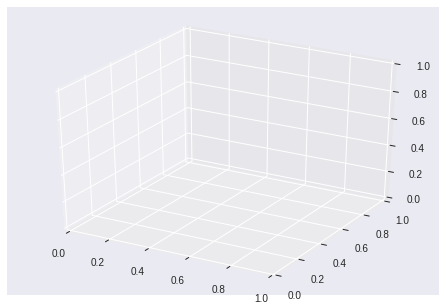

In [0]:
c1 = d2v_emmb_cls_df[d2v_emmb_cls_df.cluster_label==-1].values
c2 = d2v_emmb_cls_df[d2v_emmb_cls_df.cluster_label==0].values
c3 = d2v_emmb_cls_df[d2v_emmb_cls_df.cluster_label==1].values
c4 = d2v_emmb_cls_df[d2v_emmb_cls_df.cluster_label==2].values
data = np.float32(np.concatenate((c1, c2, c3, c4)))
colors = ["red"] * 49
colors.extend(["green"] * 1114)
colors.extend(["blue"] * 14)
colors.extend(["black"] * 10)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(2000)

In [145]:
import numpy as np
from sklearn.manifold import TSNE
new_model_dv = Doc2Vec.load('/content/drive/My Drive/colab_work/mmodel_dv200_dm0_w5_2.model')
xx = new_model_dv.docvecs.vectors_docs
xx_embedded = TSNE(n_components=2, random_state=42, verbose=True).fit_transform(xx)
xx_embedded.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1187 samples in 0.008s...
[t-SNE] Computed neighbors for 1187 samples in 0.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1187
[t-SNE] Computed conditional probabilities for sample 1187 / 1187
[t-SNE] Mean sigma: 0.113754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.849052
[t-SNE] KL divergence after 1000 iterations: 0.854525


(1187, 2)

In [0]:
#xx_embedded

In [0]:
#!pip install ggplot

/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA 

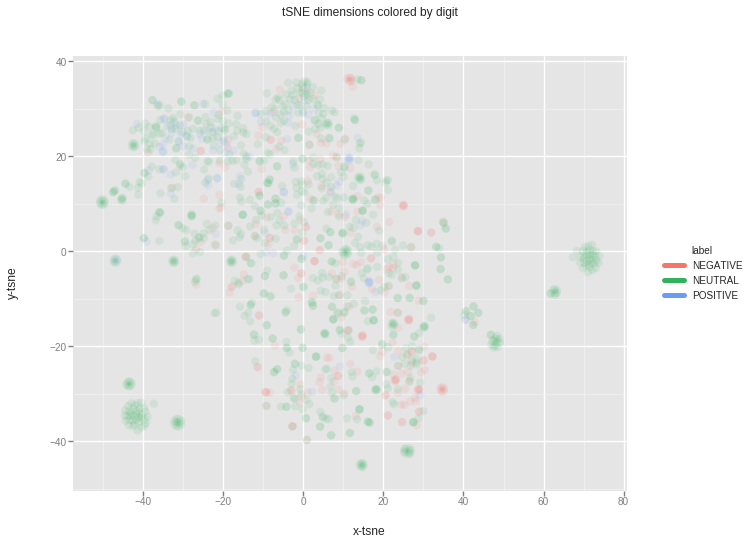

<ggplot: (-9223363267491516868)>

In [149]:
from ggplot import *
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = xx_embedded[:,0]
df_tsne['y-tsne'] = xx_embedded[:,1]
df_tsne['label'] = list(dfs_eng.Sentiment.loc[:].values)

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1, fill='white') \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [0]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data1 = np.float32(np.concatenate((c1, c2, c3)))
data1

array([[1.54045984e-01, 7.08349496e-02, 7.96566010e-02],
       [1.54697448e-01, 1.70305148e-02, 8.07242841e-03],
       [1.80468693e-01, 4.59440723e-02, 1.58947989e-01],
       [9.53960717e-02, 9.71074216e-03, 7.09437057e-02],
       [2.09368262e-02, 2.44848267e-03, 1.06341213e-01],
       [1.26746714e-01, 1.44003466e-01, 7.55226761e-02],
       [6.56223902e-03, 1.98544115e-01, 7.01137260e-02],
       [1.25458449e-01, 1.20064661e-01, 7.55717233e-02],
       [1.36425152e-01, 1.10074773e-01, 1.09180927e-01],
       [5.63694648e-02, 1.17558047e-01, 4.17036787e-02],
       [1.10637024e-01, 1.02966586e-02, 1.50389254e-01],
       [1.66772813e-01, 1.81054741e-01, 1.49372280e-01],
       [1.79738805e-01, 1.91184640e-01, 1.28042370e-01],
       [9.23999250e-02, 6.33976096e-03, 1.43529758e-01],
       [1.37962937e-01, 5.01991175e-02, 2.21081953e-02],
       [9.11869854e-02, 6.04903549e-02, 3.48255821e-02],
       [1.39564043e-02, 1.52132615e-01, 1.78052425e-01],
       [1.05360948e-01, 2.67479

In [0]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data1)
%time som.train()

CPU times: user 8.54 s, sys: 14.7 ms, total: 8.55 s
Wall time: 4.29 s


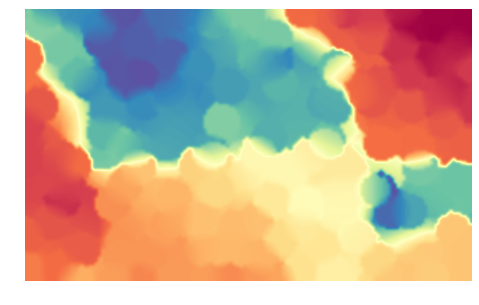

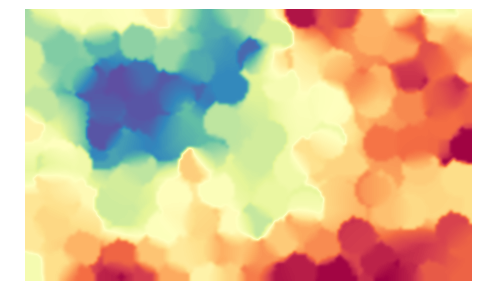

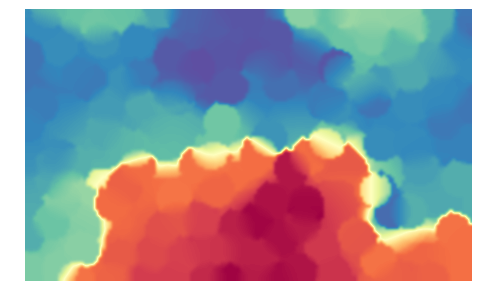

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_component_planes()

In [0]:
som.view_umatrix

<bound method Somoclu.view_umatrix of <somoclu.train.Somoclu object at 0x7f52c2c00d68>>